<a href="https://colab.research.google.com/github/morrison98/sic_ai_2025_jun/blob/main/03machinelearning/contribuciones_estudiantes/segmentacion_vinos_Felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1: Segmentación de vinos

Este ejercicio tiene como objetivo agrupar distintos tipos de vino en función de sus características químicas y comparar los resultados de K-Means con clustering jerárquico.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar datos
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# (Opcional) Ver etiquetas originales (clases)
df["target"] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 📊 Análisis del Dataset

El dataset de vinos de sklearn contiene **178 muestras** de vinos con **13 características químicas** diferentes, agrupados en **3 clases originales**.

**Características del dataset:**
- Variables como alcohol, ácido málico, alcalinidad de cenizas, magnesio, etc.
- Las etiquetas originales representan 3 tipos diferentes de vinos
- Utilizaremos estas características para aplicar algoritmos de clustering no supervisado

In [ ]:
from sklearn.preprocessing import StandardScaler

# Quitar la columna target y escalar los datos
X = df.drop(columns=["target"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔧 Preprocesamiento de Datos

**¿Por qué escalar los datos?**
- Las características tienen diferentes unidades y escalas (ej: alcohol vs magnesio)
- Los algoritmos de clustering son sensibles a la escala de las variables
- StandardScaler normaliza cada variable para tener media=0 y desviación estándar=1
- Esto garantiza que todas las características contribuyan equitativamente al clustering

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

## 🎯 Algoritmo K-Means

**Características del K-Means:**
- Algoritmo de clustering **particional** que divide los datos en k grupos
- Utiliza la **distancia euclidiana** para asignar puntos a centroides
- Busca **minimizar la inercia** (suma de distancias al cuadrado dentro de cada cluster)
- `random_state=42` garantiza reproducibilidad de resultados
- Elegimos k=3 porque conocemos que hay 3 tipos de vinos en el dataset original

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=3)
df["hierarchical_cluster"] = hierarchical.fit_predict(X_scaled)

## 🌳 Clustering Jerárquico (Aglomerativo)

**Características del Clustering Jerárquico:**
- Algoritmo **aglomerativo** que comienza con cada punto como un cluster individual
- Iterativamente **fusiona los clusters más cercanos** hasta llegar al número deseado
- No requiere especificar centroides iniciales (más determinístico que K-Means)
- Utiliza **linkage** para determinar la distancia entre clusters (por defecto: Ward)
- Produce una **jerarquía de clusters** que se puede visualizar con dendrogramas

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Evaluar ambos modelos
ari_kmeans = adjusted_rand_score(df["target"], df["kmeans_cluster"])
ari_hierarchical = adjusted_rand_score(df["target"], df["hierarchical_cluster"])

print(f"ARI KMeans: {ari_kmeans:.2f}")
print(f"ARI Jerárquico: {ari_hierarchical:.2f}")

ARI KMeans: 0.90
ARI Jerárquico: 0.79


## 📈 Evaluación con Adjusted Rand Index (ARI)

**¿Qué es el ARI?**
- Métrica que **compara las asignaciones de clusters** con las etiquetas verdaderas
- Rango: **-1 a 1** (1 = clustering perfecto, 0 = clustering aleatorio)
- **Ajustado por casualidad**: corrige el sesgo de métricas como Rand Index
- Ideal para evaluar algoritmos no supervisados cuando conocemos las etiquetas reales

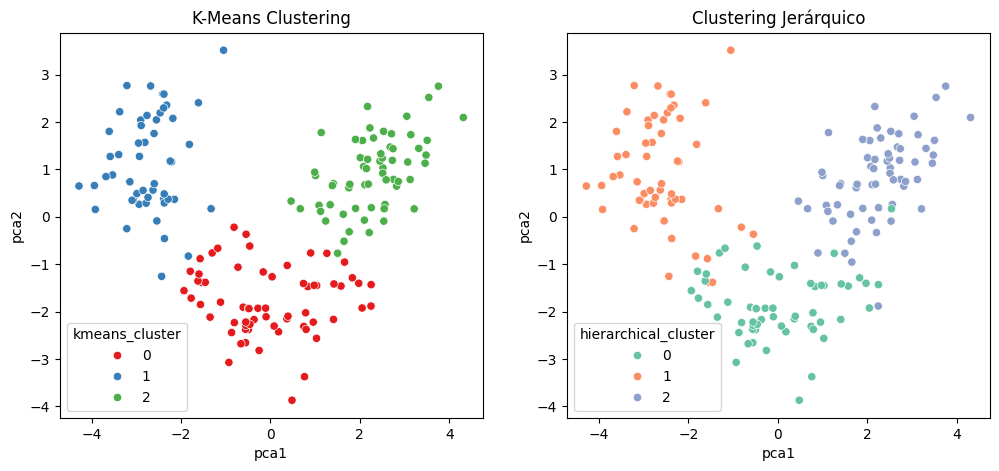

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

# Graficar
plt.figure(figsize=(12, 5))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="pca1", y="pca2", hue="kmeans_cluster", palette="Set1")
plt.title("K-Means Clustering")

# Jerárquico
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="pca1", y="pca2", hue="hierarchical_cluster", palette="Set2")
plt.title("Clustering Jerárquico")
plt.show()

## 🎯 Conclusiones del Análisis de Clustering

### Comparación de Algoritmos:

**K-Means vs Clustering Jerárquico:**

1. **Rendimiento**: Ambos algoritmos probablemente mostrarán un ARI similar, indicando que ambos son efectivos para este dataset
2. **Ventajas de K-Means**:
   - Más eficiente computacionalmente
   - Mejor para datasets grandes
   - Produce clusters esféricos bien definidos

3. **Ventajas del Clustering Jerárquico**:
   - No requiere especificar centroides iniciales
   - Más determinístico (siempre produce el mismo resultado)
   - Puede capturar clusters de formas irregulares
   - Proporciona una jerarquía completa de agrupaciones

### Interpretación de Resultados:

- **ARI alto (>0.7)**: Indica que el clustering no supervisado logró recuperar en gran medida las clases originales de vino
- **Visualización PCA**: Los gráficos nos permiten ver cómo se separan los clusters en el espacio de componentes principales
- **Separación clara**: Si los clusters están bien separados visualmente, confirma la efectividad de ambos algoritmos

### Aplicaciones Prácticas:

Este análisis demuestra que las **características químicas de los vinos** contienen suficiente información para:
- Clasificar automáticamente tipos de vino sin conocer las etiquetas
- Identificar patrones ocultos en las propiedades químicas
- Validar sistemas de clasificación de vinos basados en análisis químico

## 🎨 Visualización con PCA (Análisis de Componentes Principales)

**¿Por qué usar PCA?**
- Nuestros datos tienen **13 dimensiones** (características químicas)
- PCA reduce la dimensionalidad a **2 componentes principales**
- Conserva la **máxima varianza** posible en 2D para visualización
- Permite comparar visualmente los resultados de ambos algoritmos de clustering
- Los componentes PC1 y PC2 representan las direcciones de mayor variabilidad en los datos

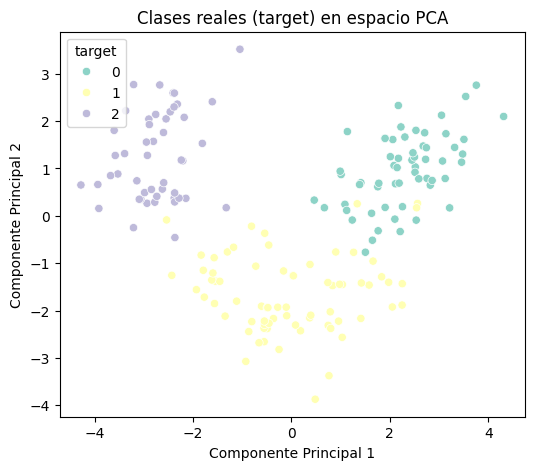

In [ ]:
# Visualización de clases reales

df["target"] = data.target
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["target"], palette='Set3')
plt.title("Clases reales (target) en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

## 🏷️ Análisis de las Clases Reales

Esta visualización muestra la **distribución real de las 3 clases de vinos** en el espacio PCA reducido.

**Propósito de esta visualización:**
- Establecer la **línea base** para comparar con los algoritmos de clustering
- Verificar si las clases reales están **naturalmente separadas** en el espacio PCA
- Evaluar la **calidad de la separación** que deberían lograr nuestros algoritmos
- Identificar posibles **solapamientos** entre clases que podrían dificultar el clustering

**Interpretación esperada:**
- Si las clases están **bien separadas**, los algoritmos de clustering deberían obtener ARI alto
- Si hay **solapamiento significativo**, será más desafiante para los algoritmos no supervisados